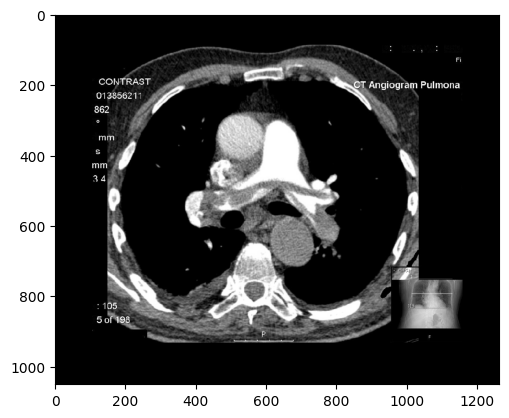

In [42]:
from math import pi

import matplotlib.pyplot as plt

from ct import load_bitmap

# filename = "Kropka.jpg"
# filename = "Shepp_logan.jpg"
filename = "SADDLE_PE-large.JPG"
# filename = "CT_ScoutView-large.jpg"

scans_count = 180

alfa_step = pi / scans_count

detectors_count = 180

detectors_angular_aperture = 1 * pi

has_to_use_sinogram_filter = True
has_to_save_intermediate_steps = False
has_to_show_intermediate_steps = False

image = load_bitmap(filename)
plt.imshow(image)
image.close()

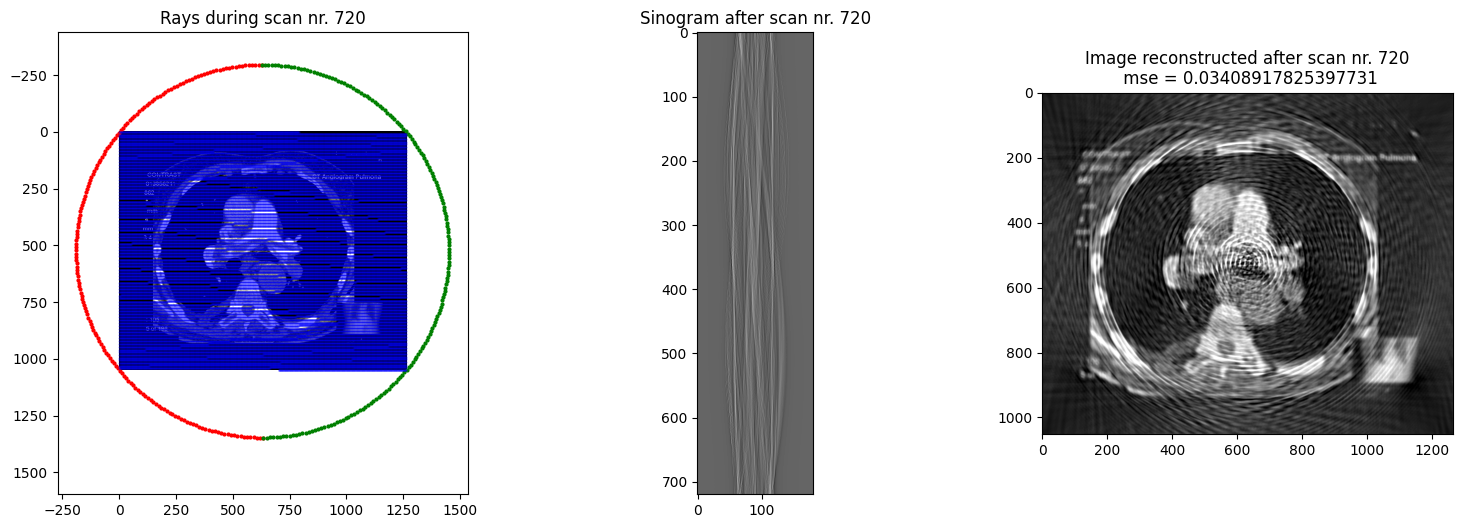

In [41]:
from ct import simulateComputedTomographyScan


states = simulateComputedTomographyScan(
    filename,
    scans_count,
    alfa_step,
    detectors_count,
    detectors_angular_aperture,
    has_to_use_sinogram_filter,
    has_to_save_intermediate_steps,
    has_to_show_intermediate_steps,
)

In [29]:
import ipywidgets

from ct import showStateAfterScan


ipywidgets.interact(
    showStateAfterScan,
    states=ipywidgets.fixed(states),
    scan=ipywidgets.IntSlider(
        min=1 if states[-1] != 1 else scans_count, max=scans_count
    ),
)

interactive(children=(IntSlider(value=180, description='scan', max=180, min=180), Checkbox(value=True, descrip…

<function ct.showStateAfterScan(states, scan, hasToBeTruncated=True, hasToBeFiltered=True)>

In [18]:
import pydicom

from ct import create_dicom_from_image

image_data = states[3]
dicom_filename = filename.split(".")[0] + ".dcm"
create_dicom_from_image(
    image_data, dicom_filename, "Example: image description", "Patient is healthy"
)

ds = pydicom.dcmread(dicom_filename)
print("Nazwisko i imię pacjenta:", str(ds.PatientName).replace("^", " "))
print("Data:", ds.StudyDate)
print("Godzina:", ds.StudyTime)
print("Opis:", ds.SeriesDescription)
print("Komentarz:", ds.get_private_item(0x000B, 0x01, "Comments").value)

Nazwisko i imię pacjenta: Kowalski Jan
Data: 20250402
Godzina: 085722
Opis: Example: image description
Komentarz: Patient is healthy


In [19]:
import numpy as np


image = load_bitmap(filename)
original = np.asarray(image, dtype=np.float64).mean(axis=-1)
image.close()

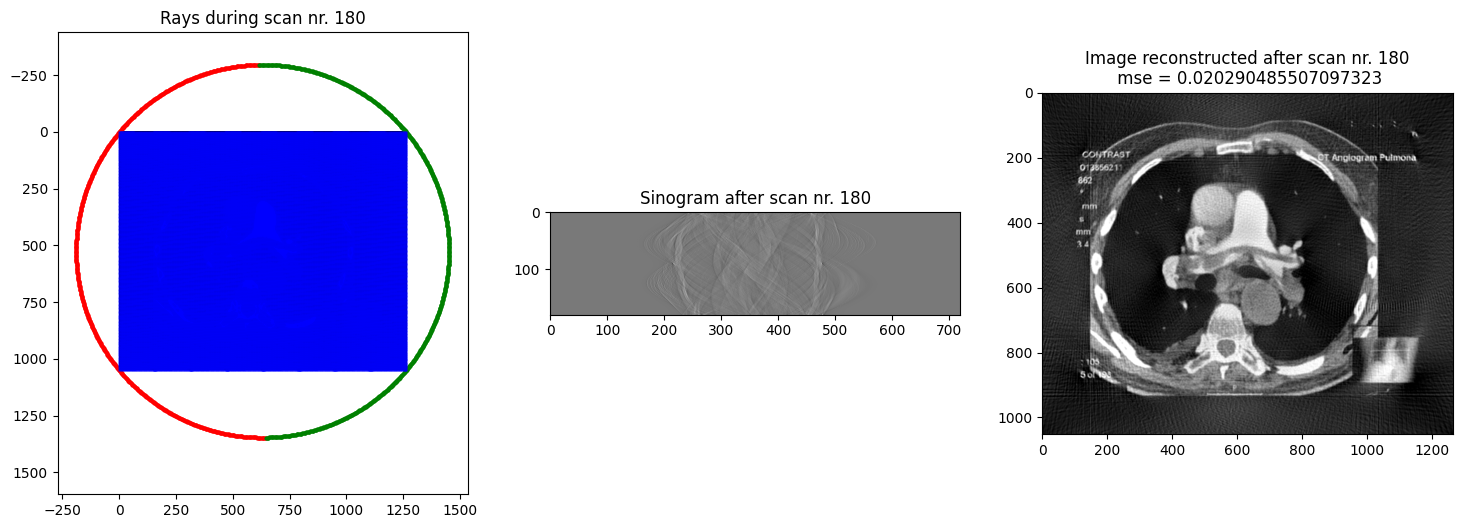

MSE zależne od liczby detektorów
 [(90, np.float64(0.10320880283810069)), (180, np.float64(0.1126589604502366)), (270, np.float64(0.13493811008664822)), (360, np.float64(0.11222766837510065)), (450, np.float64(0.1208868460361823)), (540, np.float64(0.10486173025681078)), (630, np.float64(0.11190029472445692)), (720, np.float64(0.10293265953244675))]


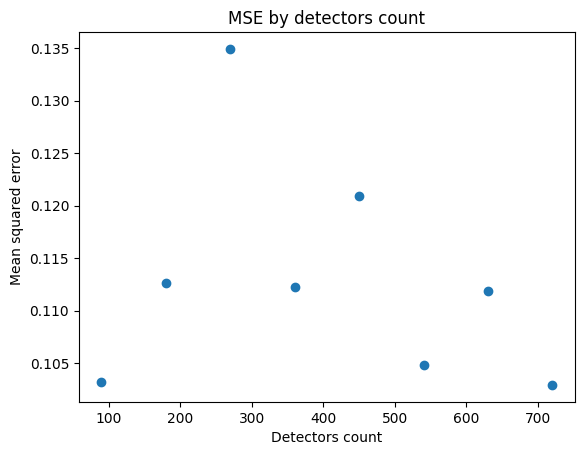

In [20]:
from ct import simulateComputedTomographyScan, mse

# I. liczba detektorów zmienia się od 90 do 720 z krokiem 90

mse_detectors = []
for detectors_count_r in range(90, 720 + 1, 90):
    states = simulateComputedTomographyScan(
        filename,
        scans_count,
        alfa_step,
        detectors_count_r,
        detectors_angular_aperture,
        has_to_use_sinogram_filter,
        has_to_save_intermediate_steps,
        has_to_show_intermediate_steps,
    )
    mse_detectors.append((detectors_count_r, mse(original, states[3])))

print("MSE zależne od liczby detektorów\n", mse_detectors)
plt.scatter(*zip(*mse_detectors))
plt.title("MSE by detectors count")
plt.xlabel("Detectors count")
plt.ylabel("Mean squared error")
plt.show()

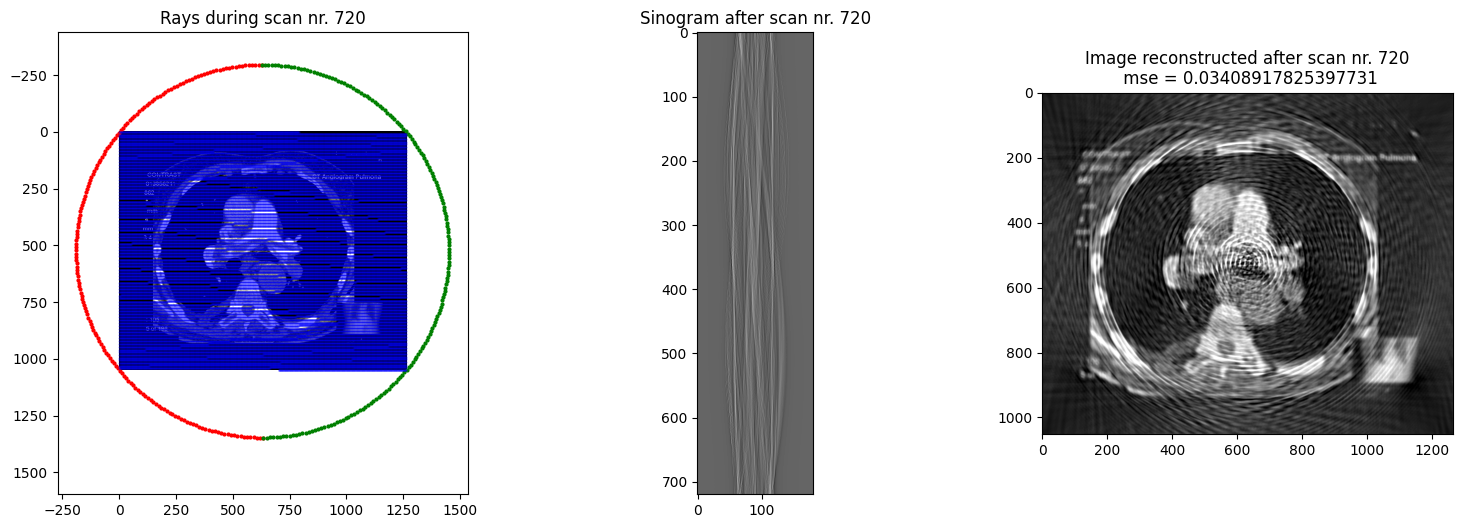

MSE zależne od liczby skanów
 [(90, np.float64(0.1349870536867822)), (180, np.float64(0.1126589604502366)), (270, np.float64(0.10264949584336068)), (360, np.float64(0.09747792870017125)), (450, np.float64(0.0967118479674079)), (540, np.float64(0.09426535331372861)), (630, np.float64(0.09371880292851084)), (720, np.float64(0.09160096348542218))]


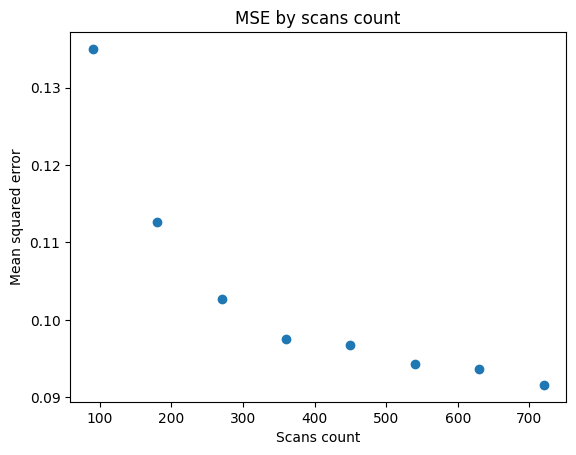

In [43]:
from ct import simulateComputedTomographyScan, mse

# II. liczba skanów zmienia się od 90 do 720 z krokiem 90

mse_scans = []
for scans_count_r in range(90, 720 + 1, 90):
    states = simulateComputedTomographyScan(
        filename,
        scans_count_r,
        pi / scans_count_r,
        detectors_count,
        detectors_angular_aperture,
        has_to_use_sinogram_filter,
        has_to_save_intermediate_steps,
        has_to_show_intermediate_steps,
    )
    mse_scans.append((scans_count_r, mse(original, states[3])))

print("MSE zależne od liczby skanów\n", mse_scans)
plt.scatter(*zip(*mse_scans))
plt.title("MSE by scans count")
plt.xlabel("Scans count")
plt.ylabel("Mean squared error")
plt.show()

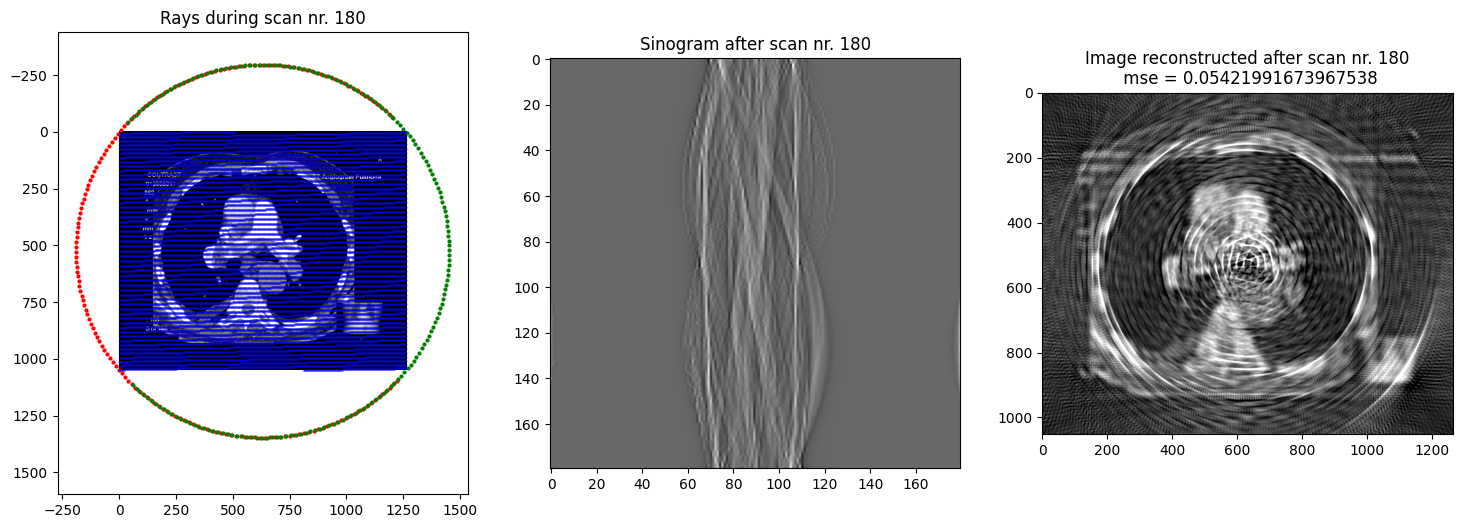

MSE zależne od apertury
 [(45, np.float64(0.07588094825087412)), (90, np.float64(0.11750855612892448)), (135, np.float64(0.12119042230792693)), (180, np.float64(0.1126589604502366)), (225, np.float64(0.1061002689183148)), (270, np.float64(0.13165566152812266))]


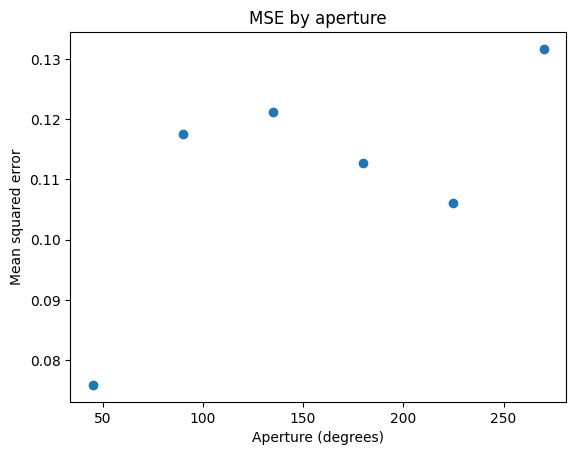

In [22]:
from ct import simulateComputedTomographyScan, mse

# III. rozpiętość wachlarza zmienia się od 45 do 270 stopni z krokiem 45 stopni.

mse_aperture = []
for detectors_angular_aperture_r in range(45, 270 + 1, 45):
    states = simulateComputedTomographyScan(
        filename,
        scans_count,
        alfa_step,
        detectors_count,
        detectors_angular_aperture_r * pi / 180,
        has_to_use_sinogram_filter,
        has_to_save_intermediate_steps,
        has_to_show_intermediate_steps,
    )
    mse_aperture.append((detectors_angular_aperture_r, mse(original, states[3])))

print("MSE zależne od apertury\n", mse_aperture)
plt.scatter(*zip(*mse_aperture))
plt.title("MSE by aperture")
plt.xlabel("Aperture (degrees)")
plt.ylabel("Mean squared error")
plt.show()

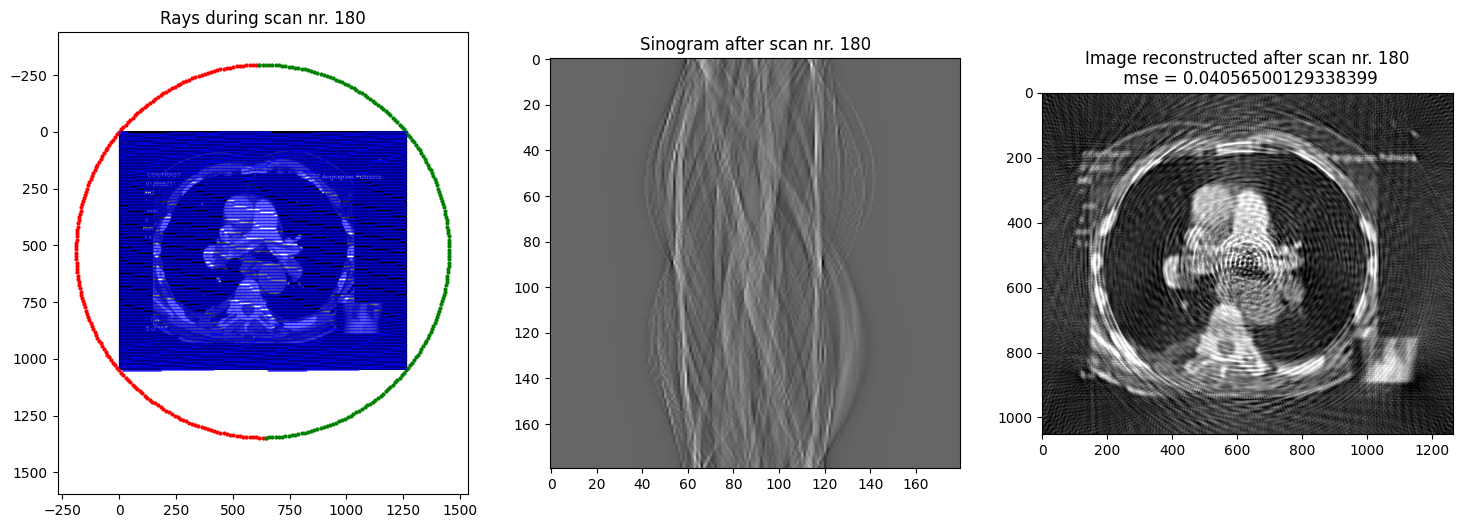

With filter applied: 0.1126589604502366
Without filter: 0.06986896931593271


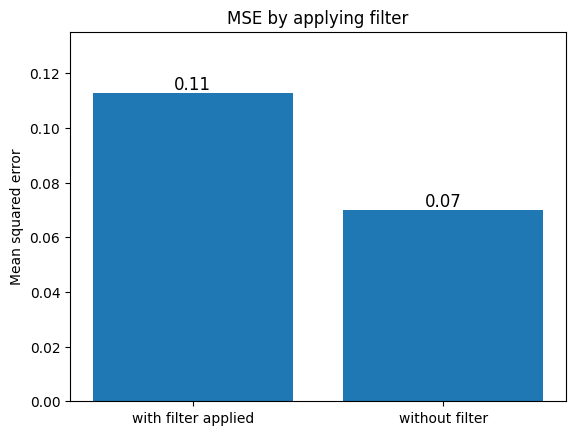

In [24]:
states_without_filter = simulateComputedTomographyScan(
    filename,
    scans_count,
    alfa_step,
    detectors_count,
    detectors_angular_aperture,
    False,
    has_to_save_intermediate_steps,
    has_to_show_intermediate_steps,
)

states_with_filter = simulateComputedTomographyScan(
    filename,
    scans_count,
    alfa_step,
    detectors_count,
    detectors_angular_aperture,
    True,
    has_to_save_intermediate_steps,
    has_to_show_intermediate_steps,
)

mse_without_filter = mse(original, states_without_filter[3])
mse_with_filter = mse(original, states_with_filter[3])
print("With filter applied:", mse_with_filter)
print("Without filter:", mse_without_filter)

values = [mse_with_filter, mse_without_filter]
bars = plt.bar(["with filter applied", "without filter"], values)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        round(yval, 2),
        ha="center",
        va="bottom",
        fontsize=12,
    )
plt.ylim(0, max(values) * 1.2)

plt.ylabel("Mean squared error")
plt.title("MSE by applying filter")
plt.show()

TODO

https://docs.google.com/presentation/d/1SeYwXUH1SB114OJO8NVovHBeupTIpM4muwNpd7r4pO0/edit#slide=id.gc39bab9b14_1_224


2.
Należy dokonać prostej analizy statystycznej w oparciu o jedną zdefiniowaną miarę jakości. Np. mając obraz wejściowy i wyjściowy można policzyć błąd średniokwadratowy (po wszystkich pikselach różnicy obrazu wejściowego i wyjściowego). Taka analiza powinna uwzględnić następujące elementy:
zmianę błędu średniokwadratowego podczas wykonywania kolejnych iteracji odwrotnej transformaty Radona dla wybranego obrazu,
zmianę błędu średniokwadratowego przy zwiększaniu dokładności próbkowania (trzy uprzednio wymienione parametry modelu emiter/detektor), 
zmianę błędu średniokwadratowy po włączeniu filtrowania. 

3.
Raport
https://docs.google.com/document/d/15zb5myHaLJqZUuv3Wv-gWXCP6wZn44s8QhGeW3izCGg/edit?tab=t.0
